In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as functional

import torchvision
import torchvision.transforms as transforms    

torch.set_printoptions(linewidth=120)

In [2]:
print(torch.__version__)
print(torchvision.__version__)

1.6.0
0.7.0


In [3]:
train_set=torchvision.datasets.FashionMNIST(
    root="./data",train=True,download=True,
    transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        # layer1-input layer
        t=t
        
        # layer2-hidden conv layer        
        t=self.conv1(t)
        t=functional.relu(t)
        t=functional.max_pool2d(t,kernel_size=2,stride=2)
        
        # layer3-hidden conv layer        
        t=self.conv2(t)
        t=functional.relu(t)
        t=functional.max_pool2d(t,kernel_size=2,stride=2)
        
        # layer4-hidden linear layer        
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=functional.relu(t)
        
        # layer5-hidden linear layer        
        t=self.fc2(t)
        t=functional.relu(t)
        
        # layer6-output layer        
        t=self.out(t)
        
        return t

In [5]:
torch.set_grad_enabled(False)

#### Passing A Single Image To The Network

In [6]:
network=Network() 

In [7]:
data_loader=torch.utils.data.DataLoader(train_set,batch_size=10)

In [8]:
sample=next(iter(train_set))

In [9]:
image,label=sample
image.shape

torch.Size([1, 28, 28])

In [10]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [11]:
image.unsqueeze(1).shape

torch.Size([1, 1, 28, 28])

In [12]:
image.unsqueeze(2).shape

torch.Size([1, 28, 1, 28])

In [13]:
image.unsqueeze(3).shape

torch.Size([1, 28, 28, 1])

In [14]:
pred=network(image.unsqueeze(0))

In [15]:
pred.shape

torch.Size([1, 10])

In [16]:
pred

tensor([[ 0.1339,  0.0140,  0.0923, -0.1187, -0.0007, -0.1122,  0.1098,  0.0083, -0.0690,  0.0686]])

In [17]:
label

9

In [18]:
pred.argmax(dim=1)

tensor([0])

In [19]:
functional.softmax(pred,dim=1)

tensor([[0.1125, 0.0998, 0.1079, 0.0874, 0.0983, 0.0879, 0.1098, 0.0992, 0.0918, 0.1054]])

In [20]:
functional.softmax(pred,dim=1).sum()

tensor(1.)

In [21]:
net1=Network()
net2=Network()

In [22]:
net1(image.unsqueeze(0))

tensor([[ 0.1089, -0.0177,  0.0869,  0.0936, -0.0592, -0.1191, -0.1570,  0.0087,  0.1438, -0.0189]])

In [23]:
net2(image.unsqueeze(0))

tensor([[ 0.0644,  0.0493,  0.0290, -0.1102,  0.1225,  0.0566,  0.0368, -0.0062, -0.0881, -0.0774]])

#### Neural Network Batch Processing

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as functional
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms    

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [25]:
print(torch.__version__)
print(torchvision.__version__)

1.6.0
0.7.0


In [26]:
def get_num_correct(preds,labels):
    return (preds.argmax(dim=-1).eq(labels)).sum().item()

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        # layer1-input layer
        t=t
        
        # layer2-hidden conv layer        
        t=self.conv1(t)
        t=functional.relu(t)
        t=functional.max_pool2d(t,kernel_size=2,stride=2)
        
        # layer3-hidden conv layer        
        t=self.conv2(t)
        t=functional.relu(t)
        t=functional.max_pool2d(t,kernel_size=2,stride=2)
        
        # layer4-hidden linear layer        
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=functional.relu(t)
        
        # layer5-hidden linear layer        
        t=self.fc2(t)
        t=functional.relu(t)
        
        # layer6-output layer        
        t=self.out(t)
        
        return t

In [28]:
network=Network()

In [29]:
train_loader=torch.utils.data.DataLoader(train_set,batch_size=100)
batch=next(iter(train_loader))
images,labels=batch

#### Calculating Loss

In [30]:
preds=network(images)
loss=functional.cross_entropy(preds,labels)
loss.item()

2.298187017440796

In [31]:
get_num_correct(preds,labels)

8

#### Calculate Gradients

In [32]:
print(network.conv1.weight.grad)

None


In [33]:
loss.backward()   #calculating gradients

In [34]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [35]:
print(network.conv1.weight.grad)

tensor([[[[ 1.1568e-07,  3.0873e-07, -3.7029e-06,  2.0507e-06,  9.5033e-05],
          [ 6.0575e-06,  1.5404e-05,  1.9339e-05,  2.9668e-05,  1.4863e-04],
          [-1.3221e-05, -1.6167e-05, -1.2498e-05, -1.0574e-05,  2.1767e-04],
          [-3.2603e-05, -2.7915e-05, -3.9430e-06, -5.2800e-07,  3.2245e-04],
          [-1.7462e-05, -1.1846e-05, -1.2988e-08,  1.1808e-04,  3.7526e-04]]],


        [[[-4.7075e-04, -1.2209e-04, -7.7235e-04, -7.8724e-04, -6.8078e-04],
          [-7.4609e-04, -3.9430e-04, -1.0494e-03, -9.6386e-04, -5.9727e-04],
          [-9.5901e-04, -9.0966e-04, -1.7419e-03, -1.1752e-03, -1.0333e-03],
          [-1.0063e-03, -1.0196e-03, -1.9265e-03, -1.5614e-03, -1.4608e-03],
          [-1.1408e-03, -1.3675e-03, -1.7925e-03, -1.0991e-03, -1.0903e-03]]],


        [[[ 8.4715e-04,  1.3098e-03,  8.0895e-04,  3.2564e-04, -2.4638e-04],
          [ 7.4675e-04,  1.2268e-03,  4.1279e-04,  2.6921e-05, -3.3148e-04],
          [ 8.2308e-04,  1.3597e-03,  4.4162e-04, -2.7942e-05, -5.02

#### Updating Weights

In [36]:
optimizer=optim.Adam(network.parameters(),lr=0.01)

In [37]:
loss.item()

2.298187017440796

In [38]:
get_num_correct(preds,labels)

8

In [39]:
optimizer.step()   #updating weights

In [40]:
preds=network(images)
loss=functional.cross_entropy(preds,labels)

In [41]:
loss.item()

2.2779154777526855

In [42]:
get_num_correct(preds,labels)

12

#### Training with a single batch

In [43]:
network=Network()

train_loader=torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer=optim.Adam(network.parameters(),lr=0.01)

batch=next(iter(train_loader))  #Get Batch
images,labels=batch

preds=network(images)    #Pass Batch
loss=functional.cross_entropy(preds,labels)  #Calculate Loss

loss.backward()   #Calculate Gradients
optimizer.step()   #Updating Weights

print("loss1:",loss.item())
preds=network(images)
loss=functional.cross_entropy(preds,labels)
print("loss2:",loss.item())

loss1: 2.310572862625122
loss2: 2.288886070251465


#### Training with single Epoch

In [44]:
network=Network()

train_loader=torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer=optim.Adam(network.parameters(),lr=0.01)

total_loss=0
total_correct=0

for batch in train_loader:   #get Batch
    images,labels=batch
    
    preds=network(images)  #passing the Batch Images
    loss=functional.cross_entropy(preds,labels)   #calculating Loss
    
    optimizer.zero_grad()
    loss.backward()  # Calculate Gradients
    optimizer.step()  #updating weights
    
    total_loss+=loss.item()
    total_correct+=get_num_correct(preds,labels)
    
print("epoch:",0,"\ttotal correct:",total_correct,"\tloss:",total_loss)

epoch: 0 	total correct: 45863 	loss: 375.5275719463825


In [45]:
total_correct/len(train_set)

0.7643833333333333

#### Training with multiple epochs

In [46]:
network=Network()

train_loader=torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer=optim.Adam(network.parameters(),lr=0.01)

for epoch in range(10):
    total_loss=0
    total_correct=0

    for batch in train_loader:   #get Batch
        images,labels=batch

        preds=network(images)  #passing the Batch Images
        loss=functional.cross_entropy(preds,labels)   #calculating Loss

        optimizer.zero_grad()
        loss.backward()  # Calculate Gradients
        optimizer.step()  #updating weights

        total_loss+=loss.item()
        total_correct+=get_num_correct(preds,labels)

    print("epoch:",epoch,"\ttotal correct:",total_correct,"\tloss:",total_loss)

epoch: 0 	total correct: 46539 	loss: 353.67214247584343
epoch: 1 	total correct: 51119 	loss: 240.8913303911686
epoch: 2 	total correct: 51966 	loss: 217.85208143293858
epoch: 3 	total correct: 52430 	loss: 205.96035438776016
epoch: 4 	total correct: 52627 	loss: 199.46251049637794
epoch: 5 	total correct: 52614 	loss: 199.57604178786278
epoch: 6 	total correct: 52857 	loss: 194.43107126653194
epoch: 7 	total correct: 53005 	loss: 190.19193750619888
epoch: 8 	total correct: 53035 	loss: 187.46607506275177
epoch: 9 	total correct: 53102 	loss: 188.02320240437984


In [47]:
total_correct/len(train_set)

0.8850333333333333

#### Confusion Matrix

In [48]:
len(train_set)

60000

In [49]:
len(train_set.targets)

60000

In [50]:
def get_all_preds(model,loader):
    all_preds=torch.tensor([])
    for batch in loader:
        images,labels=batch
        
        preds=network(images)
        all_preds=torch.cat((all_preds,preds),dim=0)
    
    return all_preds

In [51]:
prediction_loader=torch.utils.data.DataLoader(train_set,batch_size=10000)
train_preds=get_all_preds(network,prediction_loader)

In [52]:
train_preds.shape

torch.Size([60000, 10])

In [53]:
print(train_preds.requires_grad)

True


In [54]:
train_preds.grad

<ipython-input-54-54316e76a7d0>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  train_preds.grad


In [55]:
train_preds.grad_fn

In [56]:
with torch.no_grad():
    prediction_loader=torch.utils.data.DataLoader(train_set,batch_size=10000)
    train_preds=get_all_preds(network,prediction_loader)

In [57]:
print(train_preds.requires_grad)

False


In [58]:
train_preds.grad

In [59]:
train_preds.grad_fn

In [60]:
preds_correct=get_num_correct(train_preds,train_set.targets)

print("total correct:",preds_correct)
print("accuracy:",preds_correct/len(train_set))

total correct: 53284
accuracy: 0.8880666666666667


#### Building confusion matrix

In [61]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [62]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [63]:
stacked=torch.stack((train_set.targets,train_preds.argmax(dim=1)),dim=1)

In [64]:
stacked.shape

torch.Size([60000, 2])

In [65]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [66]:
stacked[0]

tensor([9, 9])

In [68]:
stacked[0].tolist()

[9, 9]

In [70]:
cmt=torch.zeros(10,10,dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [71]:
for p in stacked:
    t1,p1=p.tolist()
    cmt[t1,p1]=cmt[t1,p1]+1

In [72]:
cmt

tensor([[5517,   46,   95,  100,   14,    4,  197,    0,   27,    0],
        [   8, 5908,   13,   56,    4,    0,    8,    2,    1,    0],
        [  73,    6, 4947,   64,  630,    0,  271,    0,    9,    0],
        [ 221,  178,   13, 5410,   73,    1,   84,    1,   19,    0],
        [   8,    8,  371,  440, 4783,    0,  379,    0,   11,    0],
        [   1,    0,    2,    0,    0, 5864,    0,   73,   21,   39],
        [1431,   31,  498,  123,  418,    0, 3455,    0,   42,    2],
        [   0,    0,    0,    0,    0,   56,    0, 5664,   17,  263],
        [  14,    4,    9,   14,   30,    8,   48,    0, 5870,    3],
        [   0,    0,    0,    0,    0,   20,    0,  113,    1, 5866]])

#### Plotting a confusion matrix

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [74]:
cm=confusion_matrix(train_set.targets,train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5517,   46,   95,  100,   14,    4,  197,    0,   27,    0],
       [   8, 5908,   13,   56,    4,    0,    8,    2,    1,    0],
       [  73,    6, 4947,   64,  630,    0,  271,    0,    9,    0],
       [ 221,  178,   13, 5410,   73,    1,   84,    1,   19,    0],
       [   8,    8,  371,  440, 4783,    0,  379,    0,   11,    0],
       [   1,    0,    2,    0,    0, 5864,    0,   73,   21,   39],
       [1431,   31,  498,  123,  418,    0, 3455,    0,   42,    2],
       [   0,    0,    0,    0,    0,   56,    0, 5664,   17,  263],
       [  14,    4,    9,   14,   30,    8,   48,    0, 5870,    3],
       [   0,    0,    0,    0,    0,   20,    0,  113,    1, 5866]])

In [76]:
# Function to plot confusion matrix and heatmap

In [77]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5517   46   95  100   14    4  197    0   27    0]
 [   8 5908   13   56    4    0    8    2    1    0]
 [  73    6 4947   64  630    0  271    0    9    0]
 [ 221  178   13 5410   73    1   84    1   19    0]
 [   8    8  371  440 4783    0  379    0   11    0]
 [   1    0    2    0    0 5864    0   73   21   39]
 [1431   31  498  123  418    0 3455    0   42    2]
 [   0    0    0    0    0   56    0 5664   17  263]
 [  14    4    9   14   30    8   48    0 5870    3]
 [   0    0    0    0    0   20    0  113    1 5866]]


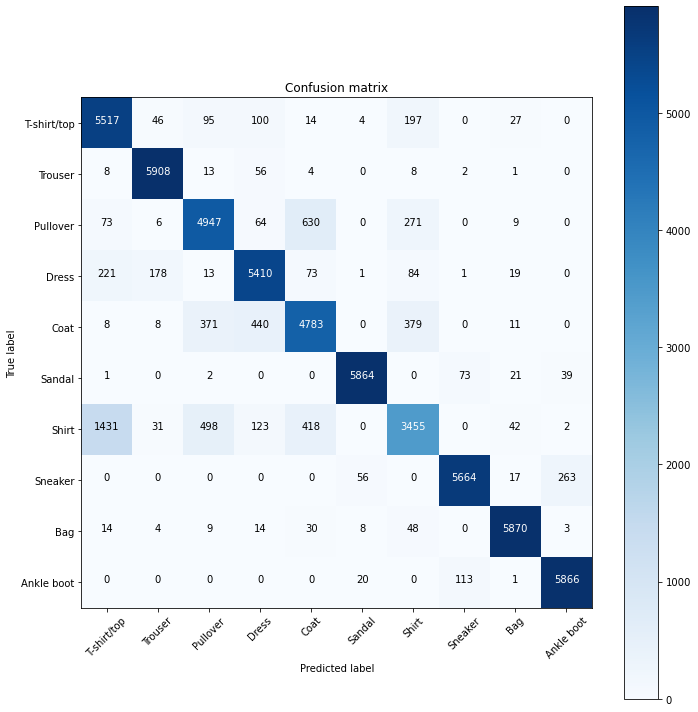

In [78]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,train_set.classes)

Confusion matrix, without normalization
tensor([[5517,   46,   95,  100,   14,    4,  197,    0,   27,    0],
        [   8, 5908,   13,   56,    4,    0,    8,    2,    1,    0],
        [  73,    6, 4947,   64,  630,    0,  271,    0,    9,    0],
        [ 221,  178,   13, 5410,   73,    1,   84,    1,   19,    0],
        [   8,    8,  371,  440, 4783,    0,  379,    0,   11,    0],
        [   1,    0,    2,    0,    0, 5864,    0,   73,   21,   39],
        [1431,   31,  498,  123,  418,    0, 3455,    0,   42,    2],
        [   0,    0,    0,    0,    0,   56,    0, 5664,   17,  263],
        [  14,    4,    9,   14,   30,    8,   48,    0, 5870,    3],
        [   0,    0,    0,    0,    0,   20,    0,  113,    1, 5866]])


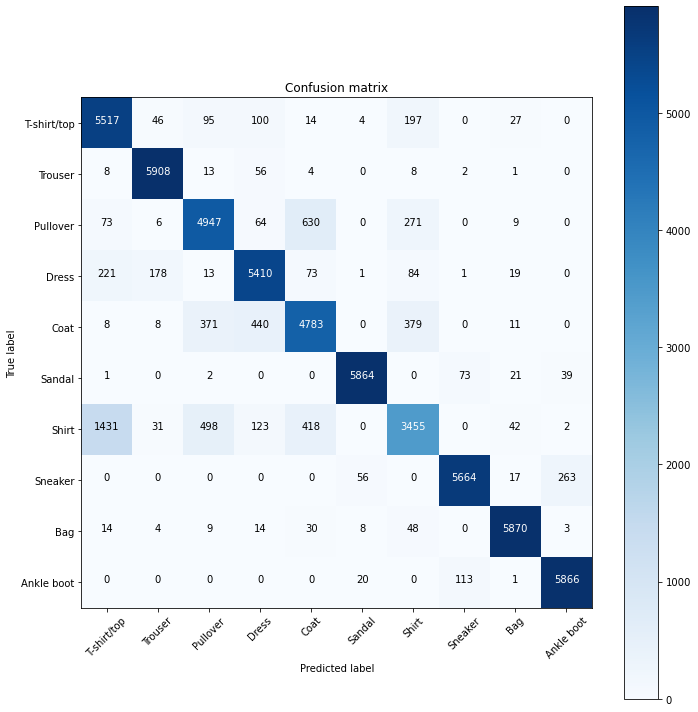

In [79]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt,train_set.classes)